In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso
)

In [3]:
df = pd.read_csv("./data/dot_traffic_train_data_20190925_foruser.csv")

In [8]:
df.shape

(4286832, 38)

In [9]:
df.head()

,date,day_of_data,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,record_type,restrictions,station_id,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,traffic_volume_counted_after_1000_to_1100,traffic_volume_counted_after_1100_to_1200,traffic_volume_counted_after_1200_to_1300,traffic_volume_counted_after_1300_to_1400,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,year_of_data,day_of_week
0,2015-01-01,1,7,West,4,2U,Urban: Principal Arterial - Other Freeways or ...,0,1,3,NaN,101234,1336,1385,821,473,339,401,558,620,943,1508,2103,2590,2853,2876,2939,3018,2638,2471,2439,1994,1568,1349,1032,767,15,5
1,2015-01-01,1,7,West,22,5R,Rural: Major Collector,1,1,3,NaN,000089,141,131,90,29,23,26,26,66,91,149,303,326,373,396,347,338,326,294,314,244,172,139,94,56,15,5
2,2015-01-01,1,7,West,36,3U,Urban: Principal Arterial - Other,1,1,3,NaN,009480,80,61,23,23,12,16,9,38,56,101,142,192,235,205,206,244,247,201,173,135,68,67,50,28,15,5
3,2015-01-01,1,5,South,30,1R,Rural: Principal Arterial - Interstate,1,1,3,NaN,000122,14,10,5,6,5,9,17,18,39,52,81,96,120,110,121,119,129,109,66,66,41,21,13,19,15,5
4,2015-01-01,1,7,West,36,2U,Urban: Principal Arterial - Other Freeways or ...,1,1,3,NaN,003380,127,81,66,53,14,17,27,64,84,81,128,210,238,264,318,373,392,329,360,249,211,171,101,117,15,5


In [13]:
df.count()

date                                         4286832
day_of_data                                  4286832
direction_of_travel                          4286832
direction_of_travel_name                     4286832
fips_state_code                              4286832
functional_classification                    4286832
functional_classification_name               4286832
lane_of_travel                               4286832
month_of_data                                4286832
record_type                                  4286832
restrictions                                       0
station_id                                   4286832
traffic_volume_counted_after_0000_to_0100    4286832
traffic_volume_counted_after_0100_to_0200    4286832
traffic_volume_counted_after_0200_to_0300    4286832
traffic_volume_counted_after_0300_to_0400    4286832
traffic_volume_counted_after_0400_to_0500    4286832
traffic_volume_counted_after_0500_to_0600    4286832
traffic_volume_counted_after_0600_to_0700    4

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


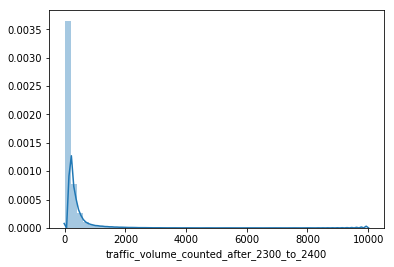

In [22]:
sns.distplot(df['traffic_volume_counted_after_2300_to_2400'])

## direction_of_travel_name、functional_classification、functional_classification_name、restrictionsを除いて、何が目的変数に効いている特徴量なのか分析する

In [4]:
orig = df.copy()

In [5]:
df = df.drop(['date','direction_of_travel_name','functional_classification','functional_classification_name','restrictions','station_id'],axis=1)

In [6]:
df.head()

,day_of_data,direction_of_travel,fips_state_code,lane_of_travel,month_of_data,record_type,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,traffic_volume_counted_after_1000_to_1100,traffic_volume_counted_after_1100_to_1200,traffic_volume_counted_after_1200_to_1300,traffic_volume_counted_after_1300_to_1400,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,year_of_data,day_of_week
0,1,7,4,0,1,3,1336,1385,821,473,339,401,558,620,943,1508,2103,2590,2853,2876,2939,3018,2638,2471,2439,1994,1568,1349,1032,767,15,5
1,1,7,22,1,1,3,141,131,90,29,23,26,26,66,91,149,303,326,373,396,347,338,326,294,314,244,172,139,94,56,15,5
2,1,7,36,1,1,3,80,61,23,23,12,16,9,38,56,101,142,192,235,205,206,244,247,201,173,135,68,67,50,28,15,5
3,1,5,30,1,1,3,14,10,5,6,5,9,17,18,39,52,81,96,120,110,121,119,129,109,66,66,41,21,13,19,15,5
4,1,7,36,1,1,3,127,81,66,53,14,17,27,64,84,81,128,210,238,264,318,373,392,329,360,249,211,171,101,117,15,5


### 全部を考慮した場合の基準を算出

In [64]:
# 学習データ内の分割
X = df.drop('traffic_volume_counted_after_2300_to_2400',axis=1)
y = df["traffic_volume_counted_after_2300_to_2400"]

# scaler = StandardScaler()  #スケーリング
# ls = Lasso(alpha=0.01) #Lasso回帰モデル
# pipeline = make_pipeline(scaler, ls) #パイプライン生成
# param_grid = [0.001, 0.01, 0.1, 1.0, 10.0,100.0,1000.0] #パラメータグリッド
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X)
# X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# pipeline.fit(X_train,y_train)

In [42]:
pipeline.score(X_train, y_train)

0.9692738411029472

In [43]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, pipeline.predict(X_test))
print(mae)

25.085811544017066


In [63]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

fit_params = {"early_stopping_rounds" : 50, 
             "eval_metric" : 'binary', 
             "eval_set" : [(X_test,y_test)],
             'eval_names': ['valid'],
             'verbose': 0,
             'categorical_feature': 'auto'}

param_test = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000, 3000, 5000],
              'num_leaves': sp_randint(6, 50), 
              'min_child_samples': sp_randint(100, 500), 
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': sp_uniform(loc=0.2, scale=0.8), 
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
              'learning_rate':[0.1,0.05,0.01]}



In [82]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV
# import lightgbm as lgb

# estimator = lgb.LGBMRegressor(num_leaves=31)

# param_grid = {
#     'learning_rate': [0.1],
#     'n_estimators': [100,1000],
#     'min_child_weight': [1e-1],
#     'max_depth': [1],
#     'reg_alpha': [1e-1],
#     'reg_lambda': [1e-1],
#     'learning_rate':[0.1]}
    
              

# gbm = GridSearchCV(estimator, param_grid, cv=3)
# gbm.fit(X_train, y_train)

# print('Best parameters found by grid search are:', gbm.best_params_)

In [79]:
# データセットを生成する
import lightgbm as lgb
from sklearn import datasets

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
        'task' : 'train',
        'boosting_type' : 'gbdt',
        'objective' : 'regression',
        'metric' : "mae",
        'num_leaves' : 31,
        'learning_rate' : 0.1,
        'n_estimators': 2000,
        'feature_fraction' : 0.6,
        'bagging_fraction' : 0.8,
        'bagging_freq': 5,
        'max_depth':10,
        "lambda_l2":1
}




# 上記のパラメータでモデルを学習する
model = lgb.train(params, lgb_train, num_boost_round=1000, valid_sets=lgb_eval)

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l1: 163.412
[2]	valid_0's l1: 147.668
[3]	valid_0's l1: 133.857
[4]	valid_0's l1: 121.104
[5]	valid_0's l1: 110.118
[6]	valid_0's l1: 99.884
[7]	valid_0's l1: 91.1376
[8]	valid_0's l1: 83.1511
[9]	valid_0's l1: 75.7877
[10]	valid_0's l1: 69.2402
[11]	valid_0's l1: 63.5307
[12]	valid_0's l1: 58.5247
[13]	valid_0's l1: 53.8991
[14]	valid_0's l1: 50.0384
[15]	valid_0's l1: 46.6603
[16]	valid_0's l1: 43.4936
[17]	valid_0's l1: 40.7483
[18]	valid_0's l1: 38.6022
[19]	valid_0's l1: 36.6227
[20]	valid_0's l1: 34.9379
[21]	valid_0's l1: 33.3553
[22]	valid_0's l1: 32.1003
[23]	valid_0's l1: 30.8692
[24]	valid_0's l1: 29.9615
[25]	valid_0's l1: 29.0589
[26]	valid_0's l1: 28.2205
[27]	valid_0's l1: 27.5344
[28]	valid_0's l1: 26.9484
[29]	valid_0's l1: 26.4379
[30]	valid_0's l1: 25.998
[31]	valid_0's l1: 25.6293
[32]	valid_0's l1: 25.3857
[33]	valid_0's l1: 25.0681
[34]	valid_0's l1: 24.834
[35]	valid_0's l1: 24.6048
[36]	valid_0's l1: 24.4361
[37]	valid_0's l1: 24.31
[38]	valid_0's 

In [47]:
mae = mean_absolute_error(y_test, model.predict(X_test))
print(mae)

19.898555947632325


In [28]:
#モデルの保存
import pickle
with open('model.pickle', mode='wb') as fp:
    pickle.dump(model, fp)

In [29]:
# モデルを保存する
filename = 'kagakusyu_model.sav'
pickle.dump(model, open(filename, 'wb'))

# # 保存したモデルをロードする
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

## 特徴選択

In [53]:
# 提出

In [66]:
test_df = pd.read_csv( "./data/traffic_data_private_1348.csv")

In [59]:
test_df.head()

,date,day_of_data,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,record_type,restrictions,station_id,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,traffic_volume_counted_after_1000_to_1100,traffic_volume_counted_after_1100_to_1200,traffic_volume_counted_after_1200_to_1300,traffic_volume_counted_after_1300_to_1400,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,year_of_data,day_of_week,traffic_volume_counted_after_2300_to_2400
0,2015-11-01,1,5,South,21,2U,Urban: Principal Arterial - Other Freeways or ...,1,11,3,NaN,034P75,269,129,113,104,98,125,200,335,459,713,777,928,1161,1082,1015,1063,1030,1095,908,779,627,472,312,15,1,NaN
1,2015-11-01,1,7,West,55,1R,Rural: Principal Arterial - Interstate,1,11,3,NaN,280001,150,63,53,61,76,136,179,339,486,657,789,845,852,865,796,786,780,754,560,474,330,218,194,15,1,NaN
2,2015-11-01,1,3,East,40,1U,Urban: Principal Arterial - Interstate,1,11,3,NaN,AVC023,316,400,152,105,120,179,329,406,582,803,893,992,1157,1069,1105,1126,1176,1057,847,706,568,531,335,15,1,NaN
3,2015-11-01,1,1,North,51,1R,Rural: Principal Arterial - Interstate,0,11,3,NaN,080499,218,212,167,169,186,204,288,440,768,1039,1412,1698,1658,2080,2016,2077,2031,1889,1618,1486,1249,986,821,15,1,NaN
4,2015-11-01,1,7,West,55,3U,Urban: Principal Arterial - Other,2,11,3,NaN,326117,44,49,21,9,16,18,25,56,114,158,176,252,286,288,285,289,276,218,161,124,86,68,30,15,1,NaN


In [67]:
test_df = test_df.drop(['date','direction_of_travel_name','functional_classification','functional_classification_name','restrictions','station_id',"traffic_volume_counted_after_2300_to_2400"],axis=1)

In [33]:
test_df.columns

Index(['day_of_data', 'direction_of_travel', 'fips_state_code',
       'lane_of_travel', 'month_of_data', 'record_type',
       'traffic_volume_counted_after_0000_to_0100',
       'traffic_volume_counted_after_0100_to_0200',
       'traffic_volume_counted_after_0200_to_0300',
       'traffic_volume_counted_after_0300_to_0400',
       'traffic_volume_counted_after_0400_to_0500',
       'traffic_volume_counted_after_0500_to_0600',
       'traffic_volume_counted_after_0600_to_0700',
       'traffic_volume_counted_after_0700_to_0800',
       'traffic_volume_counted_after_0800_to_0900',
       'traffic_volume_counted_after_0900_to_1000',
       'traffic_volume_counted_after_1000_to_1100',
       'traffic_volume_counted_after_1100_to_1200',
       'traffic_volume_counted_after_1200_to_1300',
       'traffic_volume_counted_after_1300_to_1400',
       'traffic_volume_counted_after_1400_to_1500',
       'traffic_volume_counted_after_1500_to_1600',
       'traffic_volume_counted_after_1600_to_17

In [50]:
# #正則化
# scaler = StandardScaler()
# scaler.fit(test_df)
# X_scaled = scaler.transform(test_df)

In [80]:
ans = model.predict(test_df)

In [81]:
path = './submit4.txt'
with open(path, mode='w') as f:
    for an in ans:
        an = str(an)
        f.write('{}\n'.format(an))